<a href="https://colab.research.google.com/github/so-yeon-hwang/DataSciencePractice/blob/main/Spotify_Data_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data.csv')
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [2]:
import seaborn as sns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [4]:
import matplotlib.pyplot as plt

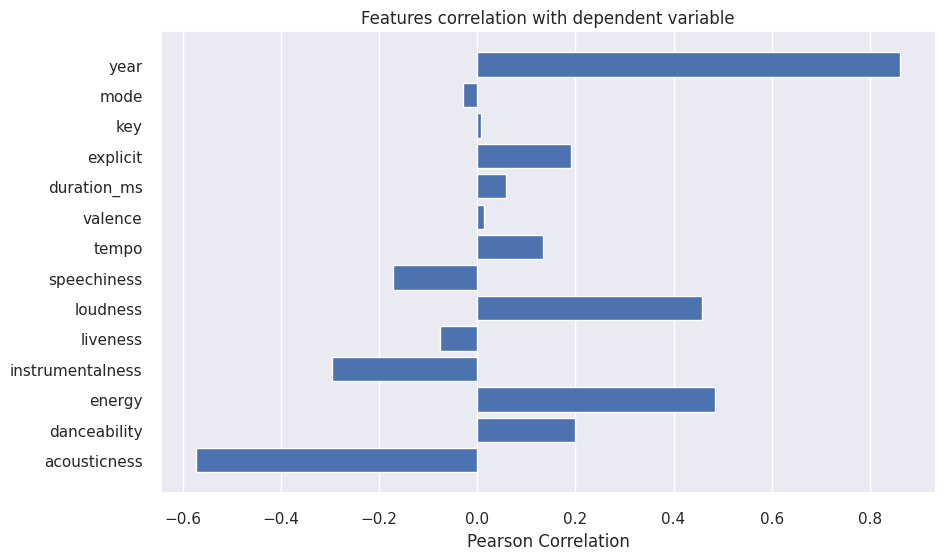

In [28]:
# Features correlation with dependent variable

from yellowbrick.target import FeatureCorrelation

feature_columns = ['acousticness','danceability','energy','instrumentalness','liveness',
                   'loudness','speechiness','tempo','valence','duration_ms','explicit','key','mode','year'] # column names in one list

X, y = df[feature_columns], df['popularity']
features = np.array(feature_columns)

visualizer = FeatureCorrelation(labels=features)

# visualization
plt.rcParams['figure.figsize'] = (10,6)
visualizer.fit(X,y)
visualizer.show()
plt.show()

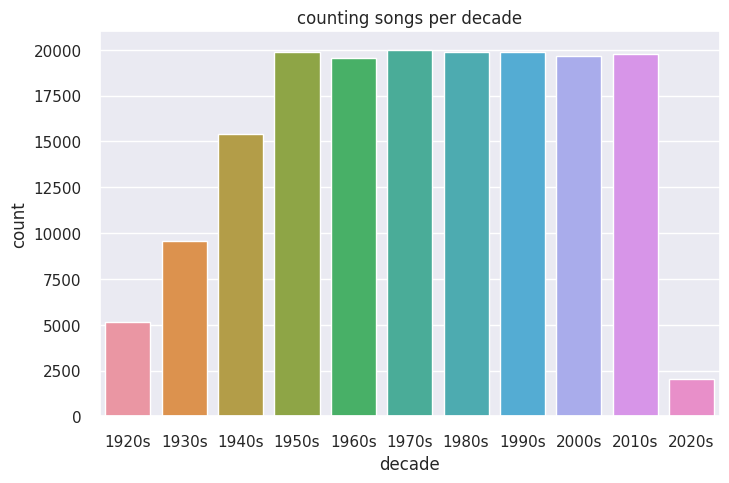

In [26]:
# def get_decade(year) : ex. 1983 < 1980s

def get_decade(year):
  period_start = int(year/10) * 10
  decade = '{0}s'.format(period_start)
  return decade

df['decade'] = df['year'].apply(get_decade) # apply function to specific column

# visualization
sns.set(rc = {'figure.figsize': (8,5)})
sns.countplot(x='decade', data=df) # [] x = specific column / data = specific dataframe ] that we'll use
plt.title("counting songs per decade")
plt.show()

In [21]:
type(get_decade(1992))

str

In [16]:
df['decade'].dtype

dtype('O')

In [32]:
# sound featrues EDA
import plotly.express as px
year_data = pd.read_csv('data_by_year.csv')

sound_features = ['acousticness','danceability','energy','instrumentalness','liveness','valence']
fig = px.line(year_data, x ='year', y =sound_features)
fig.show

## clustering songs with genres

In [33]:
genre_data = pd.read_csv('data_by_genres.csv')

In [48]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # normal distribution
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler',StandardScaler()), ('kmeans',KMeans(n_clusters = 10))])
X = genre_data.select_dtypes(np.number) # sort only numeric sources from dataframe "genre_data" > X(new df)
cluster_pipeline.fit(X) # cluster_pipeline : apply preprocessing & kmeans clustering
genre_data['cluster'] = cluster_pipeline.predict(X) # new column : cluster number 1 to 10

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,cluster
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6,0
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5,7
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7,2
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7,3
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9,2
2969,0,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7,6
2970,1,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5,2
2971,0,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7,3


In [40]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

# Data
data = [[1, 2], [3, 4], [5, 6], [7, 8]]

# constructing StandardScaler objects
scaler = StandardScaler()

# fit_transform
scaled_data = scaler.fit_transform(data)
scaled_data # transform original data > based on normal distribution

array([[-1.34164079, -1.34164079],
       [-0.4472136 , -0.4472136 ],
       [ 0.4472136 ,  0.4472136 ],
       [ 1.34164079,  1.34164079]])

In [71]:
clusters = list(genre_data['cluster'].unique())
clusters.sort() # sorting function only (printX)
clusters

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## VIsualization (KMeans)

In [ ]:
# visualizing
from sklearn.manifold import TSNE

In [ ]:
# basic code source
# Visualizing the Clusters with t-SNE

from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

In [77]:
X

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,cluster
0,1,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6,1
1,1,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5,9
2,1,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7,7
3,1,0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7,5
4,1,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9,7
2969,0,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7,4
2970,1,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5,7
2971,0,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7,5


In [75]:
from sklearn.manifold import TSNE
# TSNE : t-distributed Stochastic Neighbor embedding
# Transform high dimension of dataset into low dimension of dataset / usually for visualization

# construct new objects
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2))]) #: scaler(normal distribution) + tsne(dimensionality reduction)
genre_embedding = tsne_pipeline.fit_transform(X)

In [76]:
genre_embedding

array([[ 54.707466,   7.960161],
       [ 16.780678,  12.114629],
       [-17.710379, -17.3631  ],
       ...,
       [ -6.969482, -46.918663],
       [ 34.969276,  -9.23909 ],
       [  8.012509, -37.903854]], dtype=float32)